In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [9]:
data = pd.read_csv('data/results.csv')
country = pd.read_csv('data/countryContinent.csv')

In [10]:
data.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [11]:
data["Year"]=pd.to_datetime(data['date']).dt.year
data["Month"]=pd.to_datetime(data['date']).dt.month
data=data.drop(columns=['date'], axis=1)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [12]:
data['total_score']=data['home_score'] + data['away_score']
data['goal_diff']=data['home_score'] - data['away_score']
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,goal_diff
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,2
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,3


In [13]:
con=[(data['home_score']==data['away_score']),(data['home_score']>data['away_score']),(data['home_score']<data['away_score'])]
val=[0,1,2] 
val2=['Draw',data['home_team'],data['away_team']]
data['result']=np.select(con,val) #draw =0, home_win = 1, away_win = 2
data['Winner']=np.select(con,val2)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,goal_diff,result,Winner
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,0,Draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,2,1,England
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,1,Scotland
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,0,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,3,1,Scotland


In [14]:
#### Goals scored
highscore=data.groupby('Winner').sum()
highscore=highscore[['home_score','away_score','total_score']].sort_values(by=['total_score'],ascending=False)
highscore=highscore.drop(['Draw'])
highscore.head(10)

,home_score,away_score,total_score
Winner,,,
England,1156,1033,2189
Brazil,1358,830,2188
Germany,1230,885,2115
Sweden,1079,803,1882
Argentina,1156,618,1774
Hungary,1021,727,1748
Netherlands,909,590,1499
Mexico,945,482,1427
France,902,521,1423


In [15]:
highscore1 = highscore.head(75)
highscore1.reset_index(inplace=True)

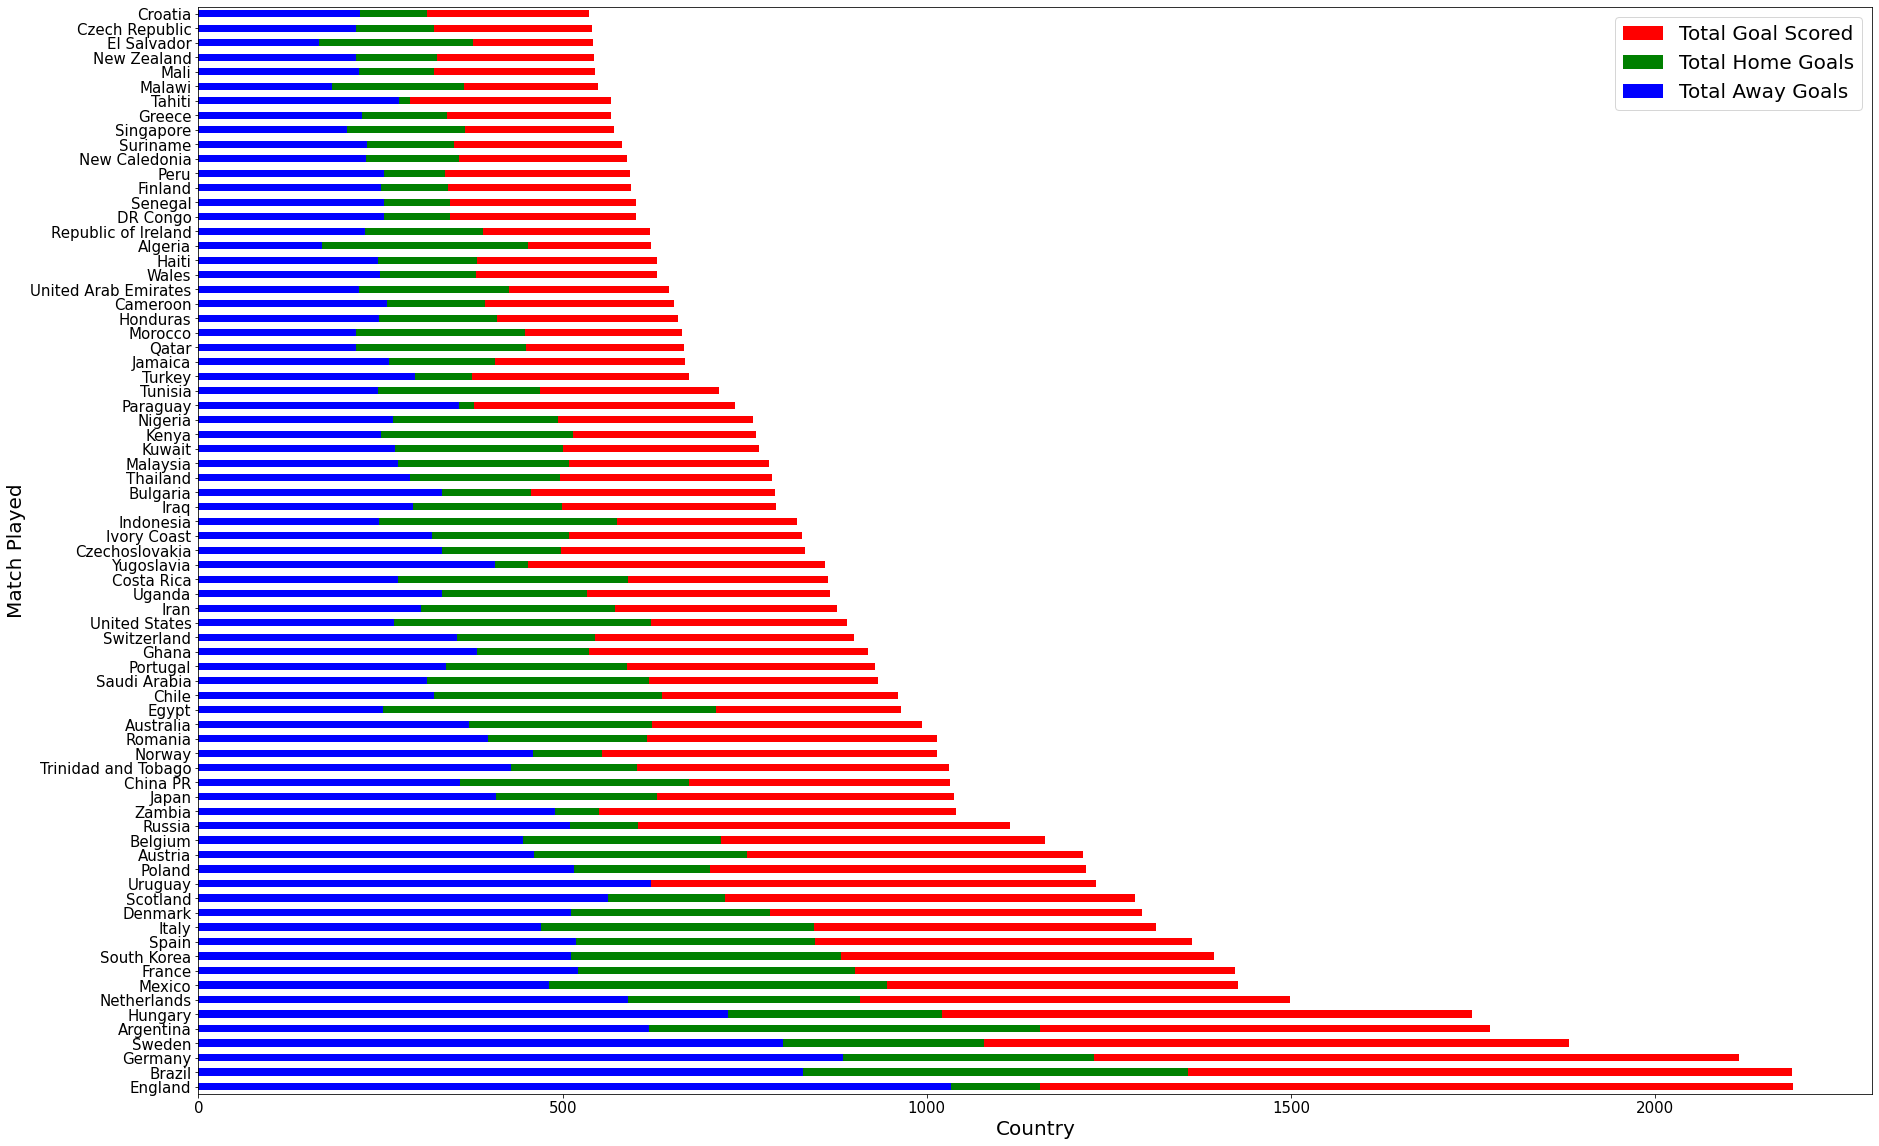

In [16]:
_, ax = plt.subplots(figsize=(30,20))
legend = ['Total Goal Scored','Total Home Goals','Total Away Goals']
highscore1.plot.barh(x='Winner', y='total_score',ax=ax, color='red', rot = 0)
highscore1.plot.barh(x='Winner', y='home_score',ax=ax, color='green', rot = 0)
highscore1.plot.barh(x='Winner', y='away_score',ax=ax, color='blue', rot = 0)
ax.legend(legend,fontsize = 20)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Match Played', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [17]:
#### Most Winning Country 
highwin=data.groupby('Winner').count()
highwin=highwin[['result']].sort_values(by=['result'],ascending=False)
highwin=highwin.drop(['Draw'])

highwin.head(10)

,result
Winner,
Brazil,625
England,577
Germany,558
Argentina,526
Sweden,502
South Korea,455
Mexico,442
Hungary,437
Italy,428


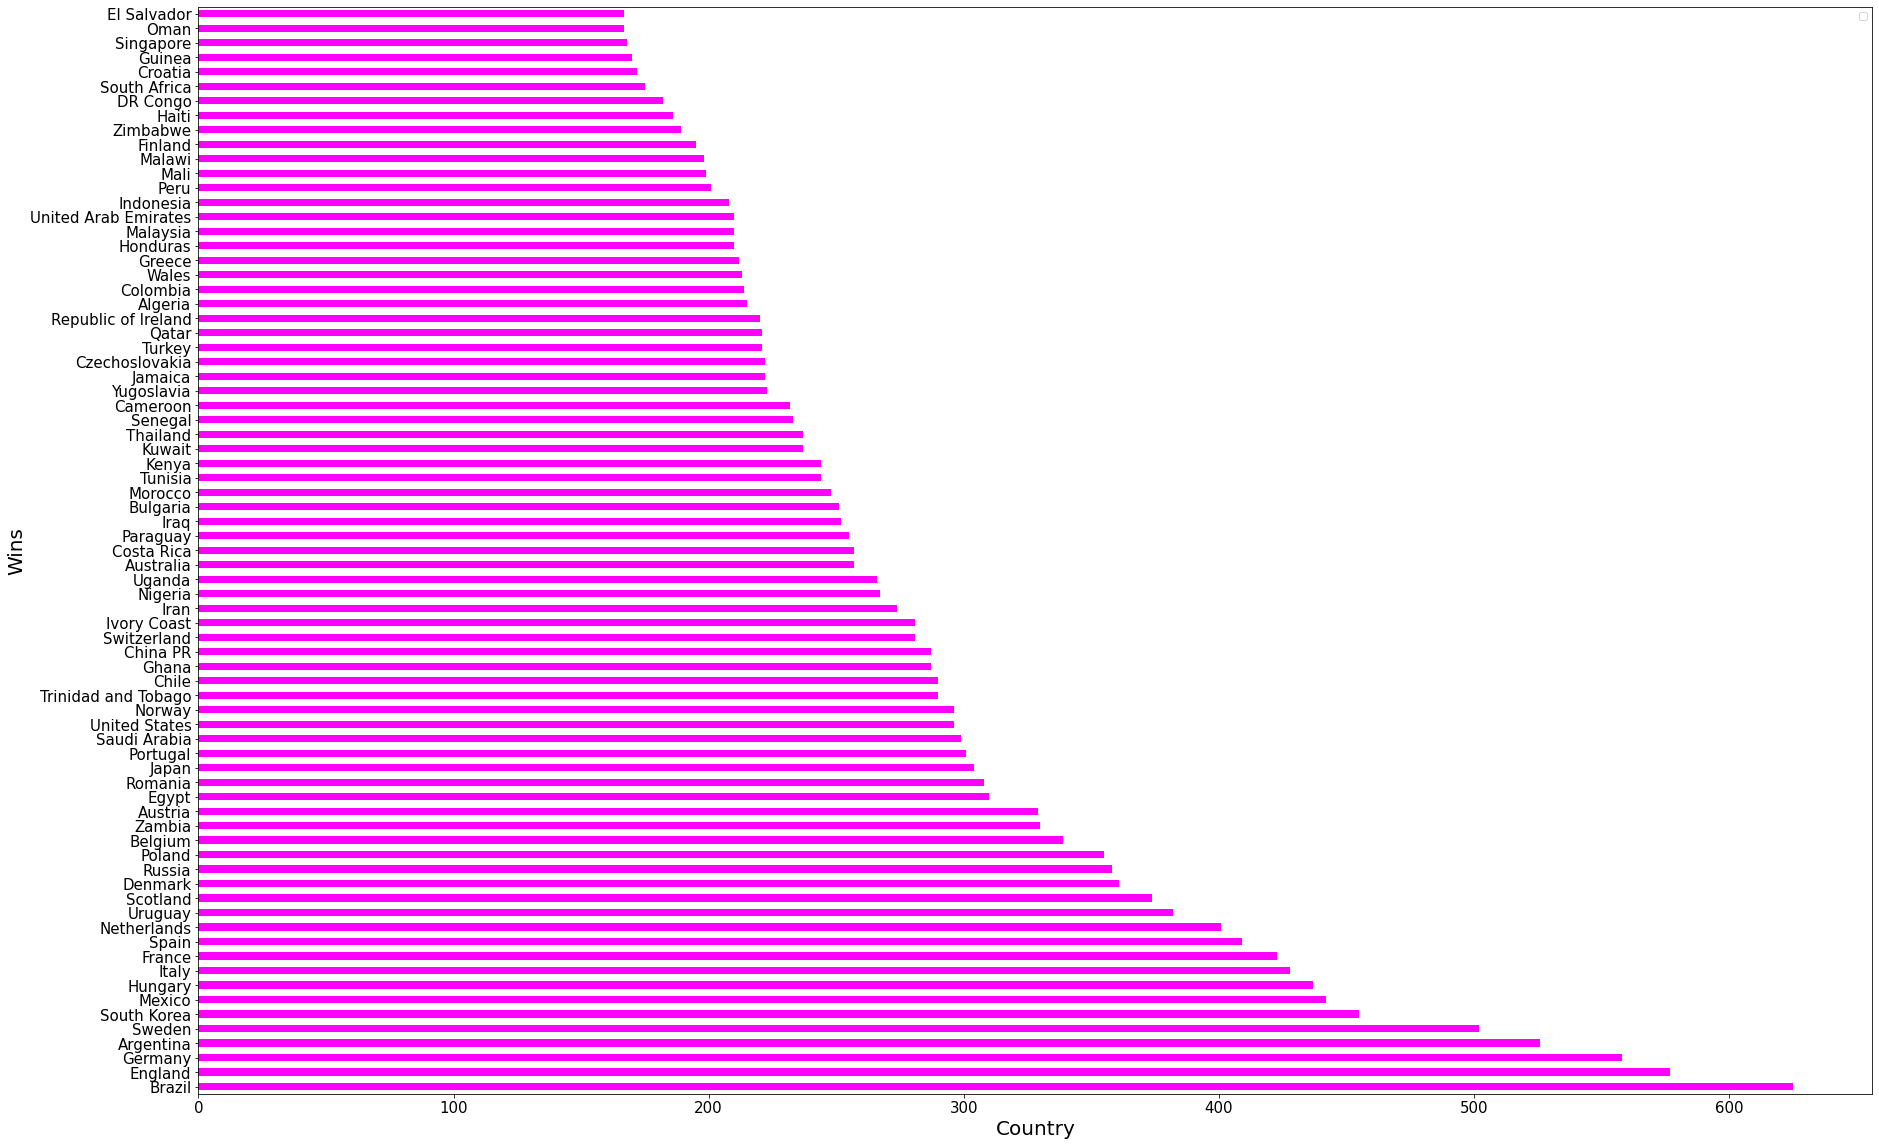

In [18]:
highwin1 = highwin.head(75)
highwin1.reset_index(inplace=True)
highwin1.plot.barh(y='result',x = 'Winner',  color='magenta', rot = 0, figsize=(30,20))
plt.legend('')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Wins', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [19]:
ovrbest=pd.merge(highscore, highwin, how='inner', on='Winner')
ovrbest.head()

,home_score,away_score,total_score,result
Winner,,,,
England,1156,1033,2189,577
Brazil,1358,830,2188,625
Germany,1230,885,2115,558
Sweden,1079,803,1882,502
Argentina,1156,618,1774,526


In [20]:
#### Total Match played
match = data.groupby('home_team').count() + data.groupby('away_team').count()
match = match[['city']].sort_values(by=['city'],ascending=False)
match = match.rename(columns = {'city':'match_played'})
match['Winner']=match.index
match.head()

,match_played,Winner
Sweden,1026.0,Sweden
England,1017.0,England
Brazil,981.0,Brazil
Argentina,980.0,Argentina
Germany,957.0,Germany


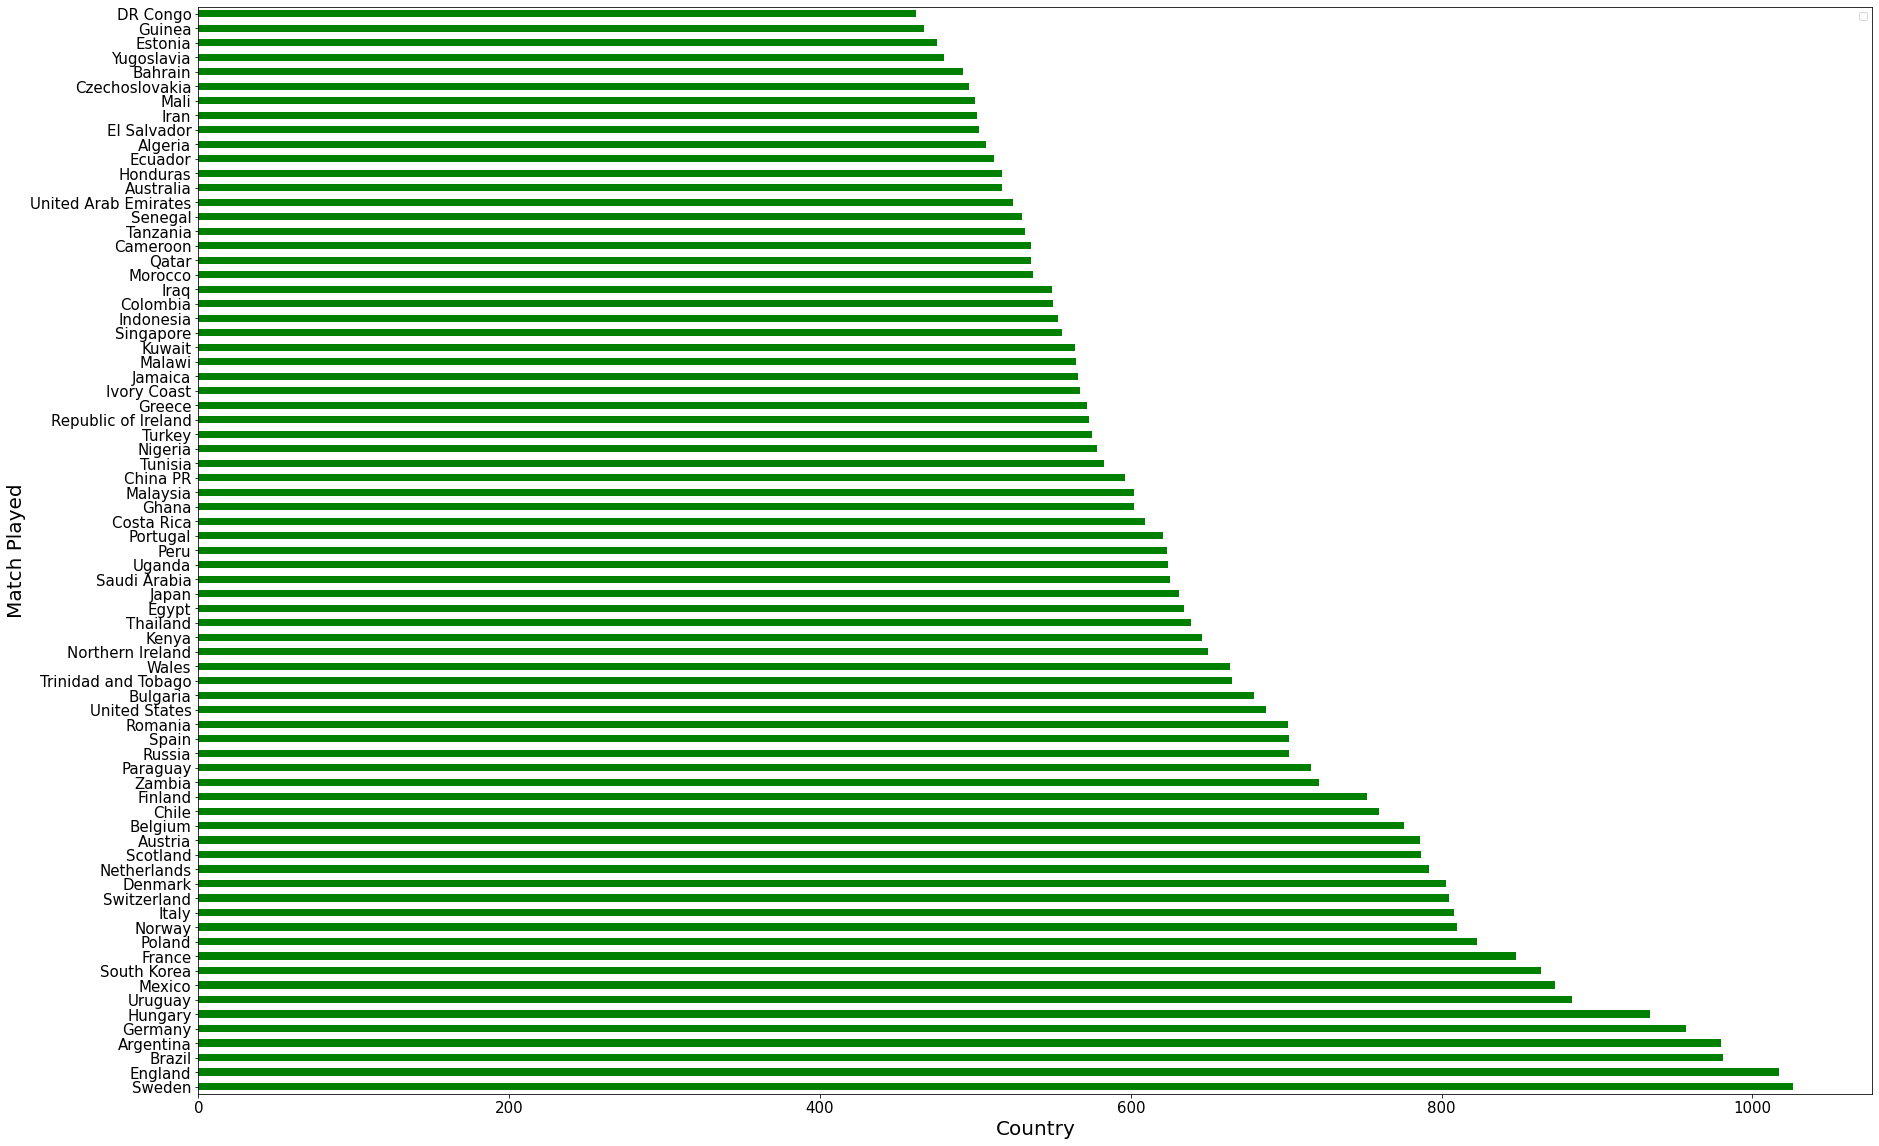

In [21]:
match1 = match.head(75)
legend=['Total Match Played']
match1.plot.barh(color='green', rot = 0,figsize=(30,20))
plt.legend('')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Match Played', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [22]:
#### Indepth Information 
bestteam=pd.merge(ovrbest,match,how='inner', on='Winner')
bestteam['win_per_game']=bestteam['result']/bestteam['match_played']
bestteam['goal_per_game']=bestteam['total_score']/bestteam['match_played']
bestteam=bestteam[['Winner', 'match_played', 'total_score', 'result', 'win_per_game', 'goal_per_game']]
bestteam.head()

,Winner,match_played,total_score,result,win_per_game,goal_per_game
0,England,1017.0,2189,577,0.567355,2.152409
1,Brazil,981.0,2188,625,0.637105,2.230377
2,Germany,957.0,2115,558,0.583072,2.210031
3,Sweden,1026.0,1882,502,0.489279,1.834308
4,Argentina,980.0,1774,526,0.536735,1.810204


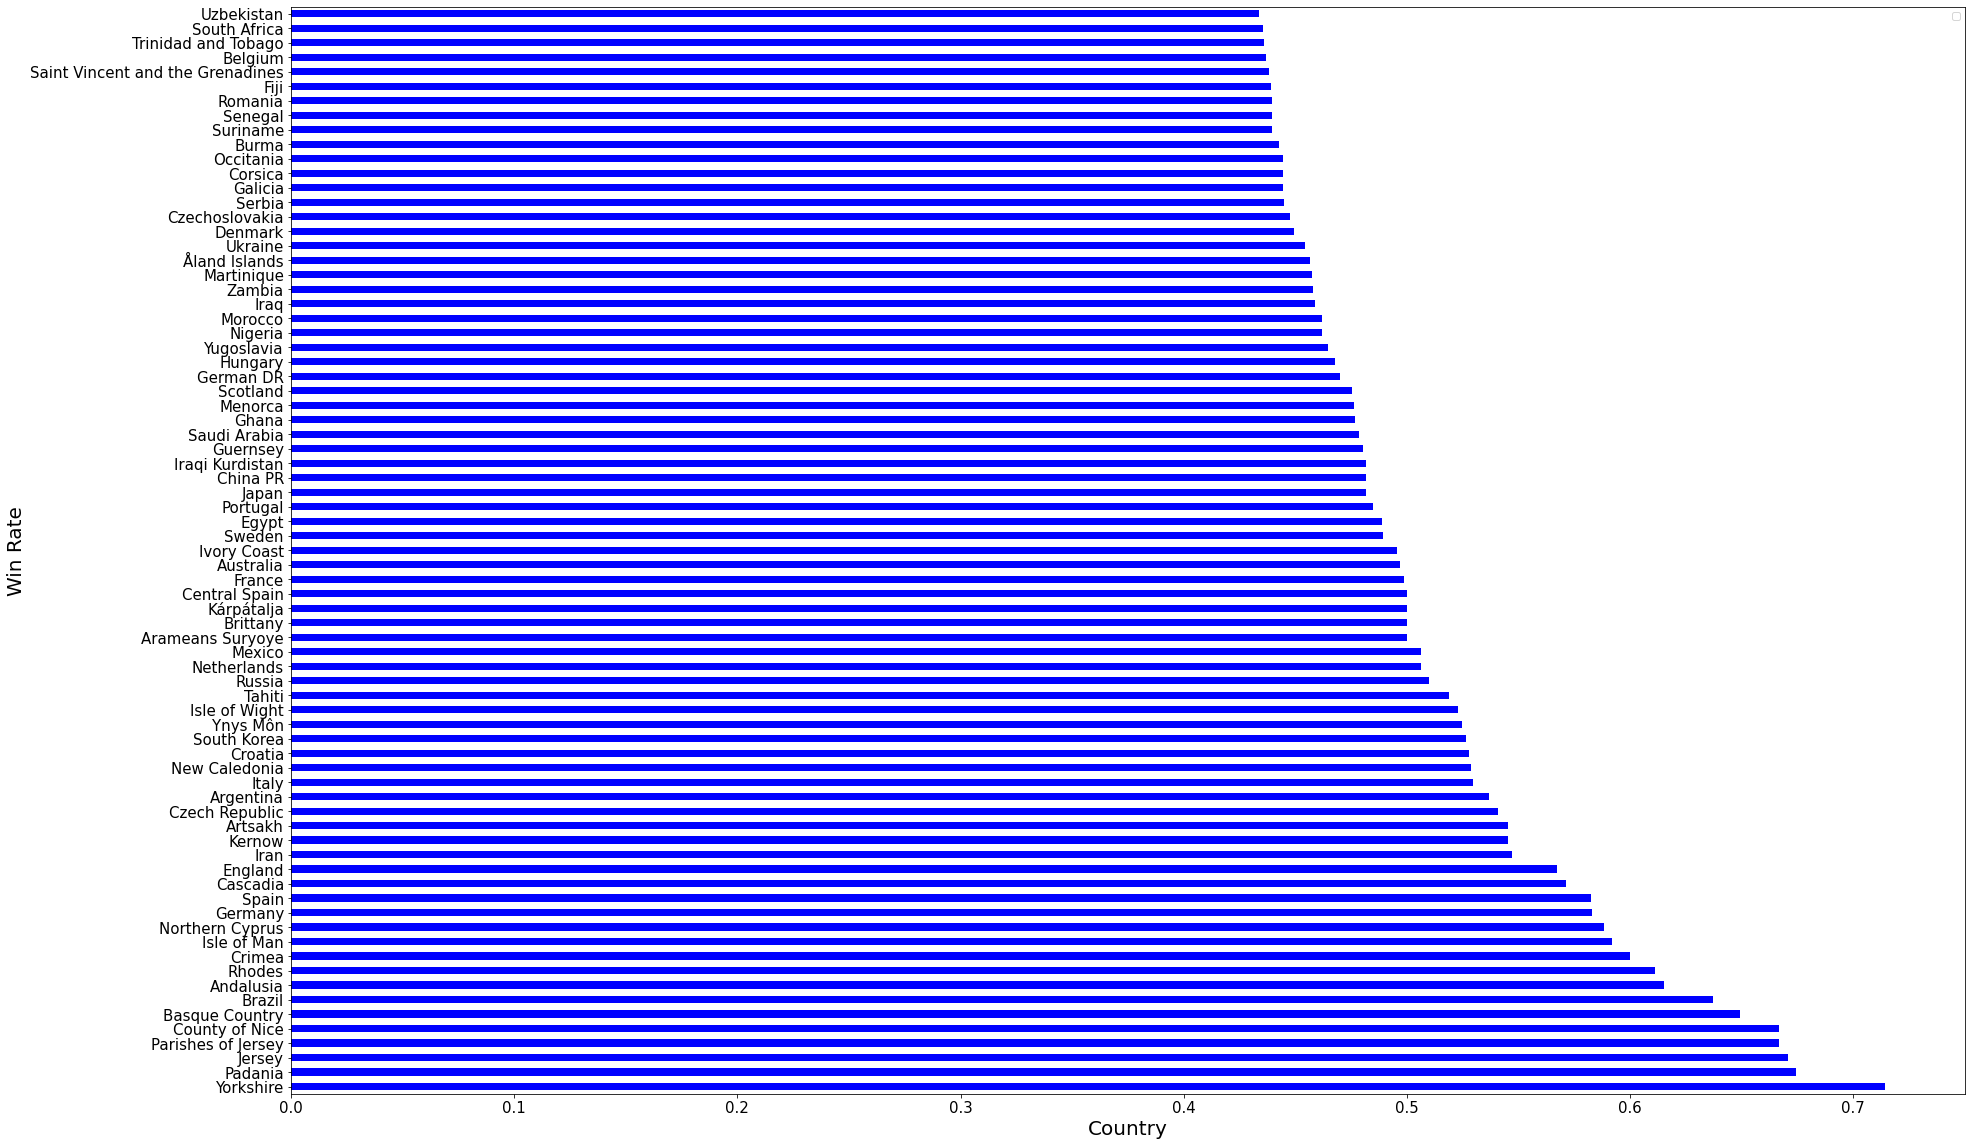

In [23]:
bestteam1=bestteam.sort_values(by=['win_per_game'],ascending=False)
bestteam2 =bestteam1.head(75)
bestteam2.plot.barh(x='Winner', y='win_per_game',color='blue', rot = 0,figsize=(30,20))
plt.legend('')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Win Rate', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

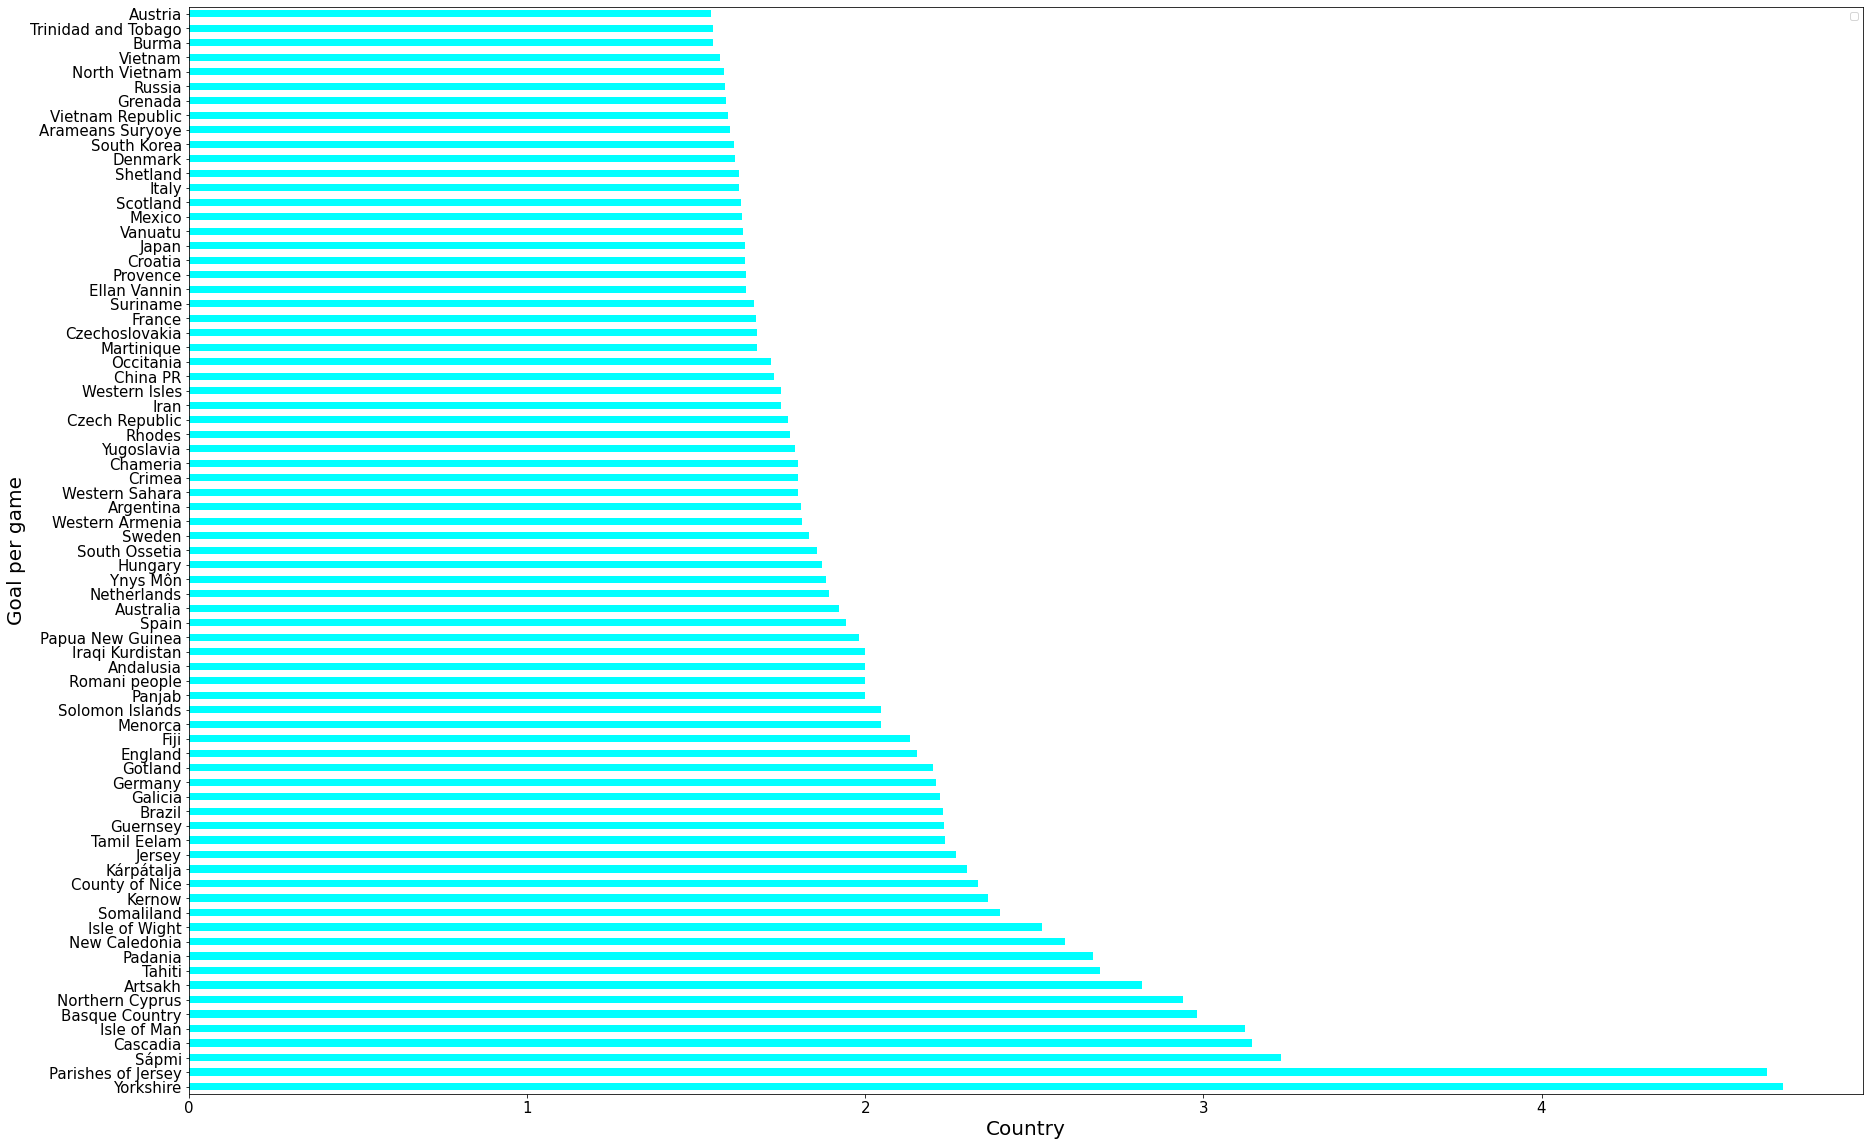

In [24]:
bestteam3=bestteam.sort_values(by=['goal_per_game'],ascending=False)
bestteam4 =bestteam3.head(75)
bestteam4.plot.barh(x='Winner', y='goal_per_game',color='cyan', rot = 0,figsize=(30,20))
plt.legend('')
plt.xlabel('Country', fontsize=20)
plt.ylabel('Goal per game', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

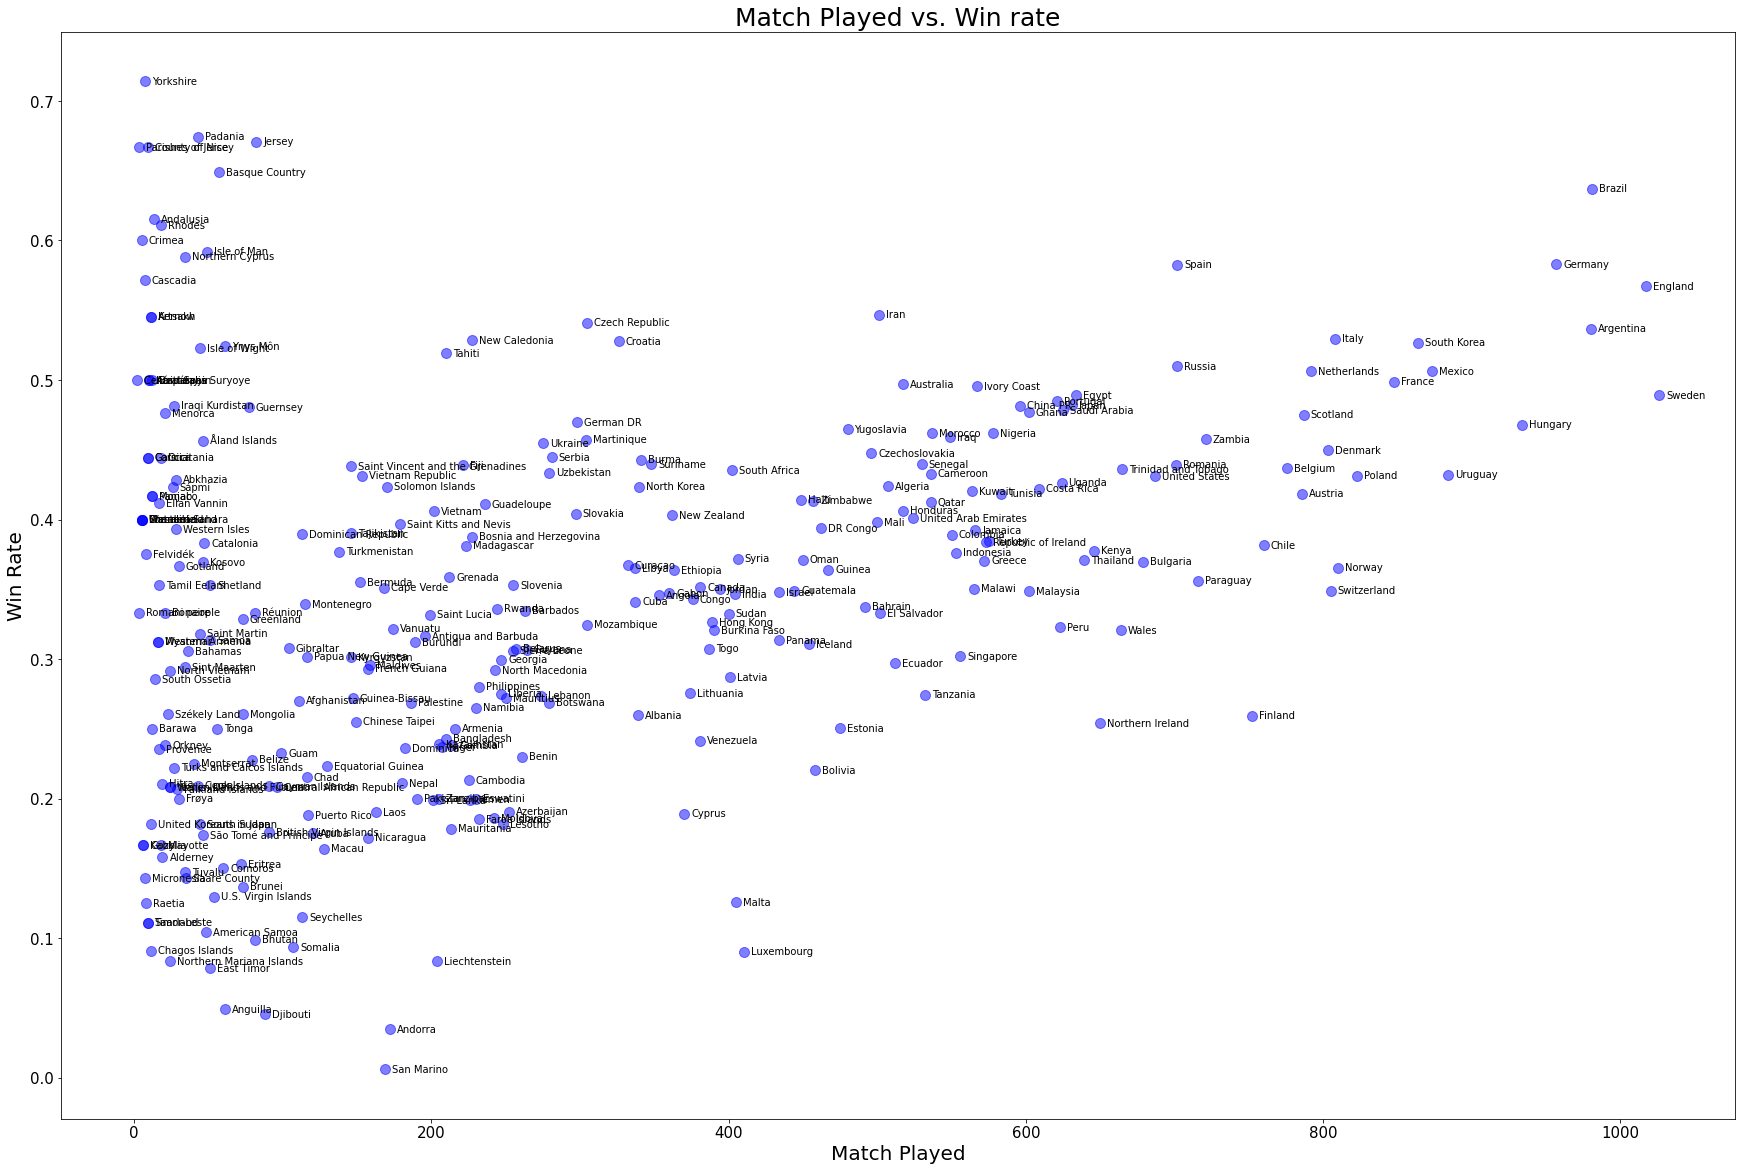

In [25]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(30, 20))
plt.title('Match Played vs. Win rate', fontsize = 25)

# Plot the scatter points
x=bestteam['match_played']
y=bestteam['win_per_game']
labels=bestteam['Winner']
ax.scatter(x,y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.xlabel('Match Played', fontsize = 20)
plt.ylabel('Win Rate', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

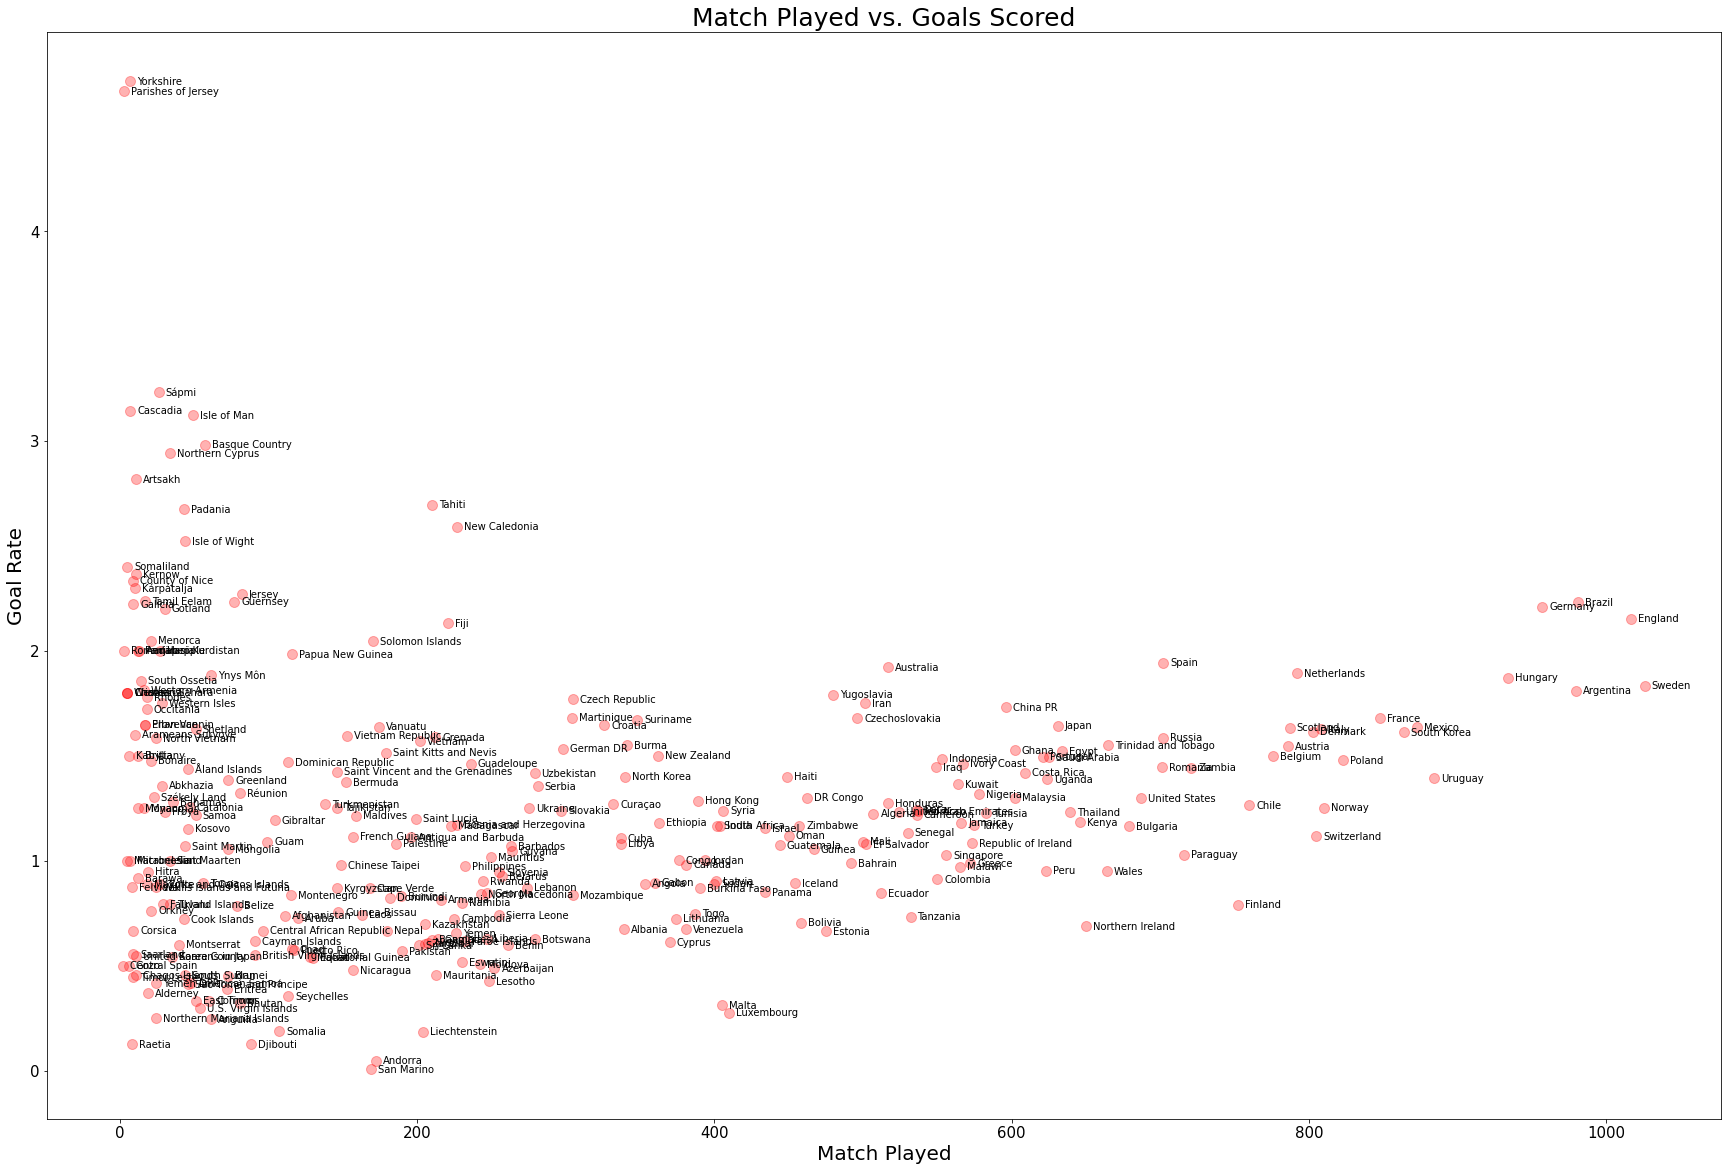

In [26]:
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(30, 20))
plt.title('Match Played vs. Goals Scored', fontsize = 25)

# Plot the scatter points
x=bestteam['match_played']
y=bestteam['goal_per_game']
labels=bestteam['Winner']
ax.scatter(x,y,
           color="red",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.3,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.xlabel('Match Played', fontsize = 20)
plt.ylabel('Goal Rate', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [27]:
#What trends have there been in international football throughout the ages - 
#home advantage, total goals scored, distribution of teams' strength et
condition=[(data['home_team']==data['Winner']),(data['away_team']==data['Winner']),(data['Winner']=='Draw')]
val=['home_win','away_win', 'Draw']
data['home_away_win']=np.select(condition,val)
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,goal_diff,result,Winner,home_away_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,0,Draw,Draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,2,1,England,home_win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,1,Scotland,home_win
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,0,Draw,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,3,1,Scotland,home_win


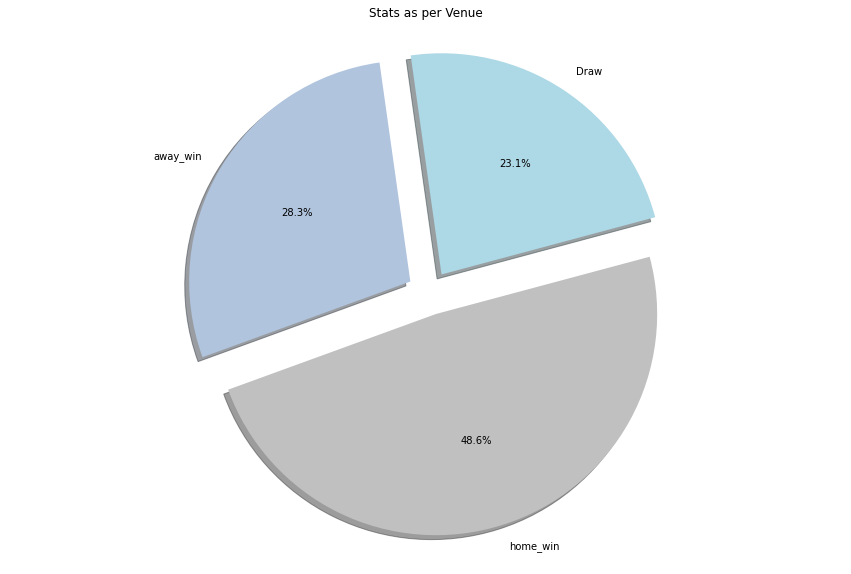

In [28]:
#home advantage?
data1=data.groupby('home_away_win').count()
data1[['Winner']]
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(15, 10))
plt.pie(data1['Winner'], labels=data1.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Stats as per Venue')
plt.axis('equal')
plt.show()

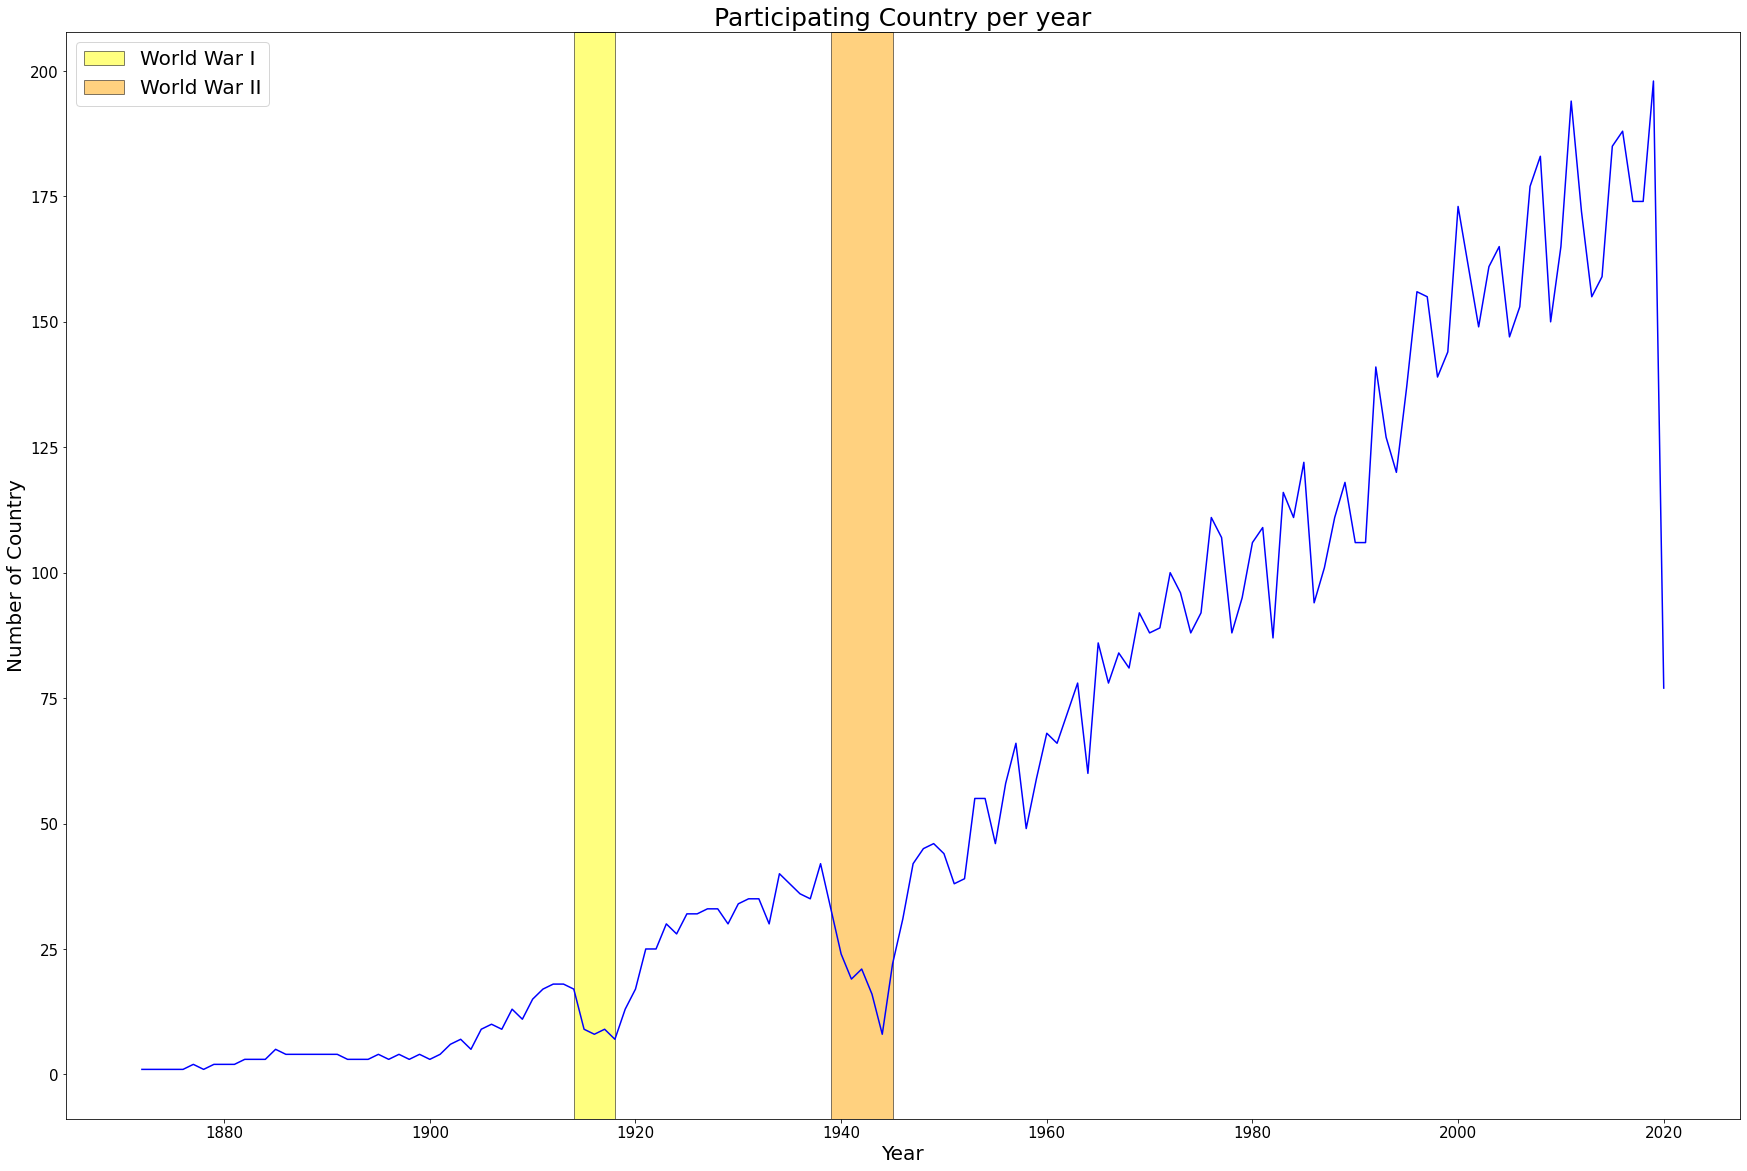

In [29]:
#how has the number of countries changed 
data_c=data[['Year','country']]
data_c = data_c.drop_duplicates()
data_c1=data_c.groupby('Year').count()


fig, ax = plt.subplots(figsize=(30,20))
ax.plot(data_c1.index, data_c1['country'], color='blue')
ax.axvspan(1914, 1918, ec ='black', alpha=0.5, color='yellow', label='World War I')
ax.axvspan(1939, 1945, ec ='black', alpha=0.5, color='orange', label='World War II')
ax.legend(fontsize = 20)
plt.title('Participating Country per year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Country', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [30]:
data.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,Month,total_score,goal_diff,result,Winner,home_away_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,0,0,Draw,Draw
1,England,Scotland,4,2,Friendly,London,England,False,1873,3,6,2,1,England,home_win
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,3,1,1,Scotland,home_win
3,England,Scotland,2,2,Friendly,London,England,False,1875,3,4,0,0,Draw,Draw
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,3,3,1,Scotland,home_win


In [31]:
#### Tournament games
tour = data.groupby('tournament').count()
tour=tour[['country']].sort_values(by=['country'],ascending=False)
tour.head()

,country
tournament,
Friendly,17127
FIFA World Cup qualification,7236
UEFA Euro qualification,2582
African Cup of Nations qualification,1672
FIFA World Cup,900


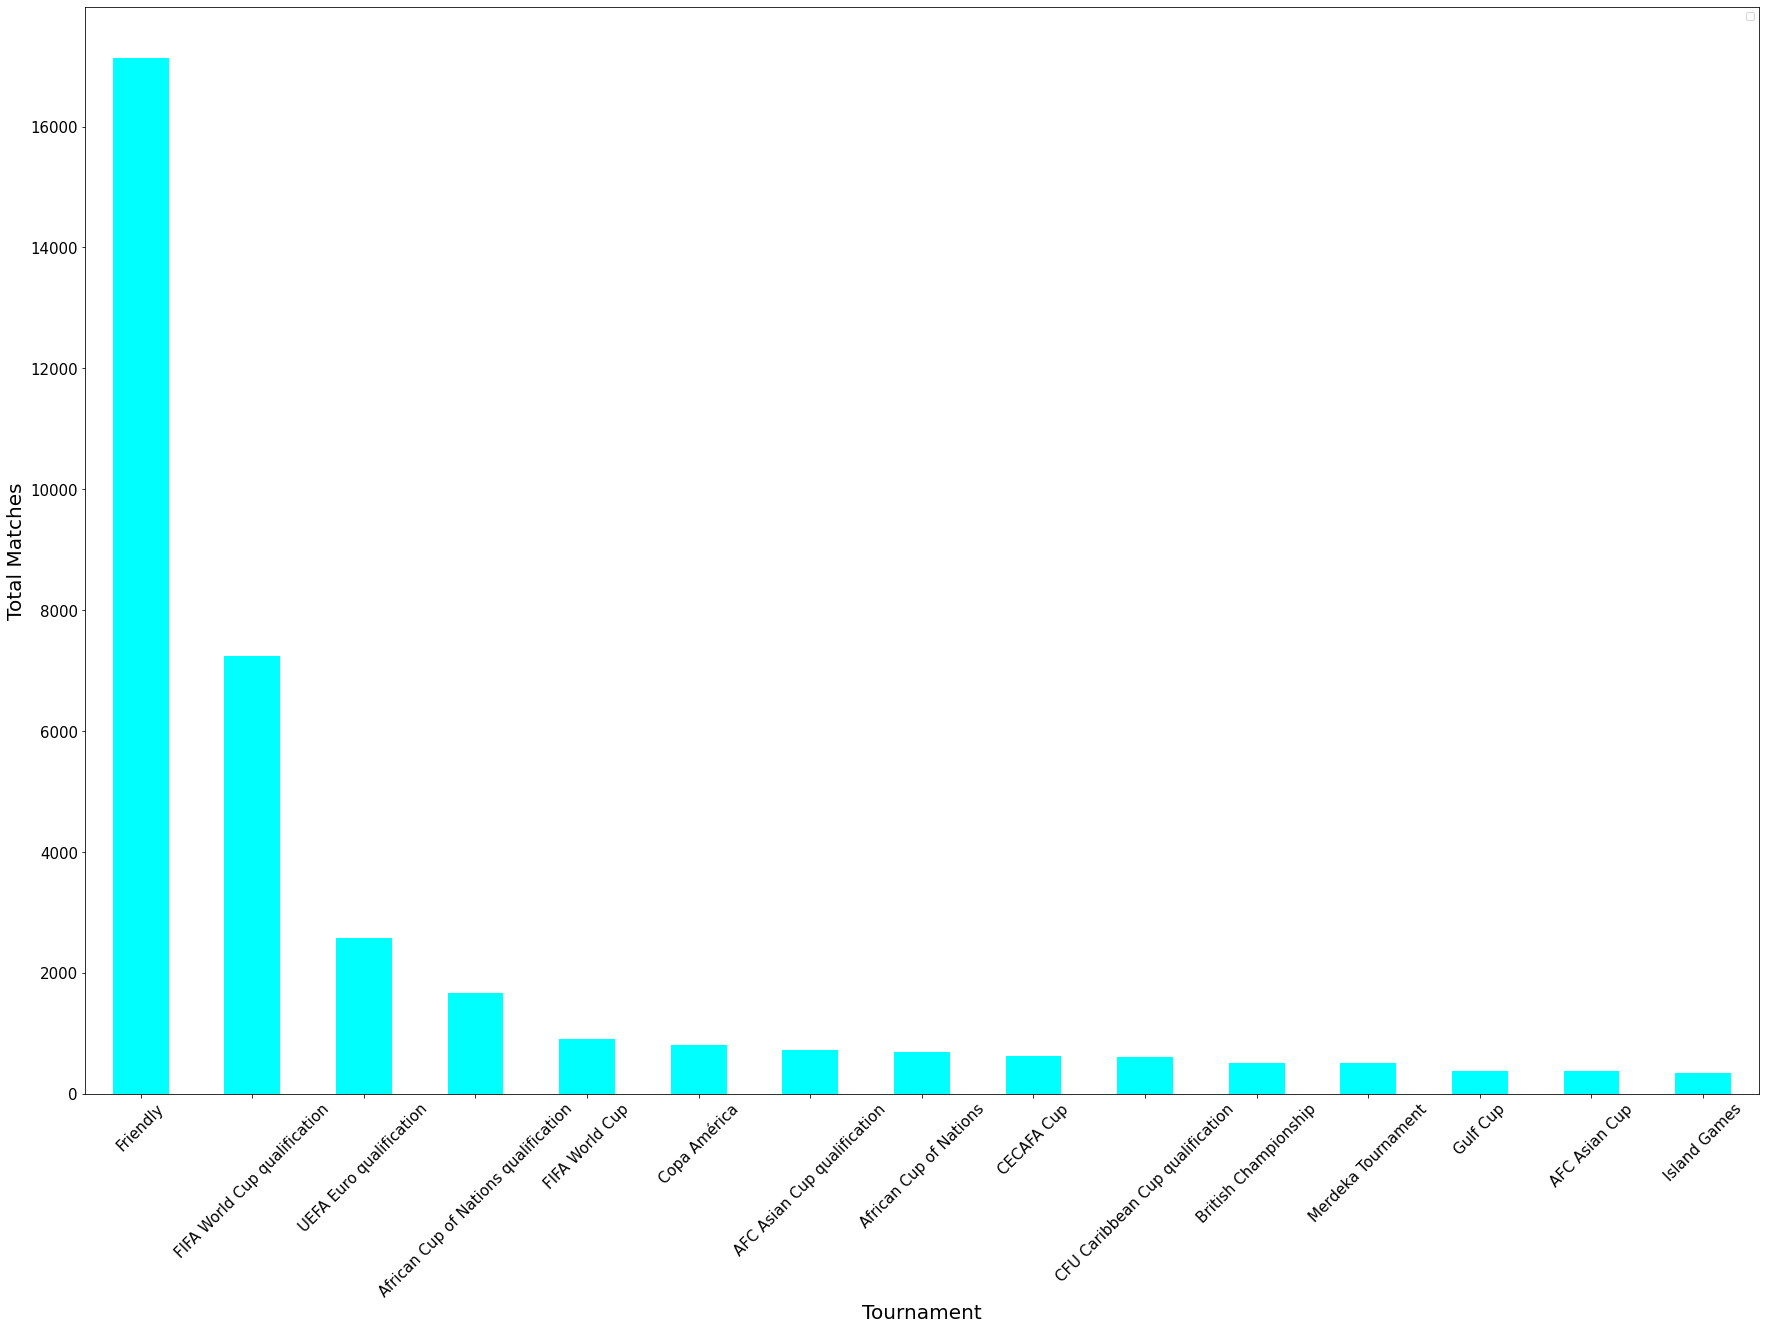

In [32]:
tour1 = tour.head(15)
tour1.plot.bar(color='cyan', rot = 45,figsize=(30,20))
plt.legend('')
plt.xlabel('Tournament', fontsize=20)
plt.ylabel('Total Matches', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [33]:
#### Neutral venue
venue = data.groupby('neutral').count()
venue=venue[['country']].sort_values(by=['country'],ascending=False)
venue.head()

,country
neutral,
False,31530
True,10316


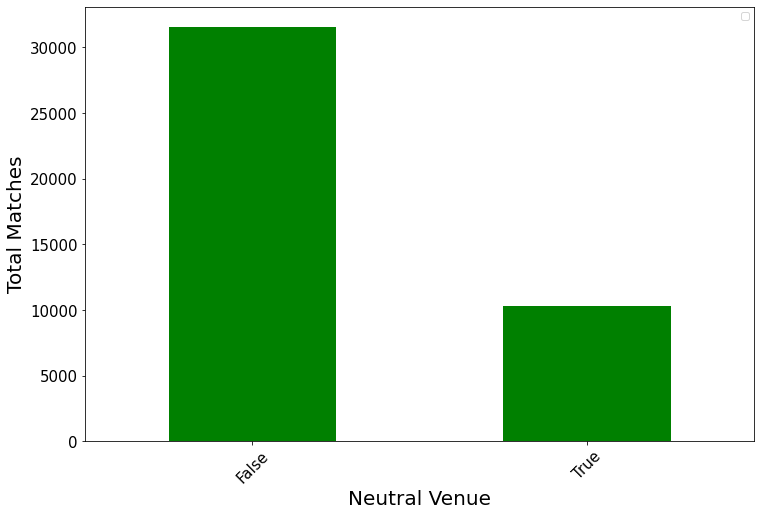

In [34]:
venue.plot.bar(color='green', rot = 45,figsize=(12,8))
plt.legend('')
plt.xlabel('Neutral Venue', fontsize=20)
plt.ylabel('Total Matches', fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [35]:
#### Dominating country
dom=data[['Year','Winner']]
dom.head()

,Year,Winner
0,1872,Draw
1,1873,England
2,1874,Scotland
3,1875,Draw
4,1876,Scotland


In [36]:
def find(Winner):
    if "Draw" not in Winner.lower():
        return True
    return False

dom2=dom[dom['Winner'].apply(find)]

dom2.head(-1)

,Year,Winner
0,1872,Draw
1,1873,England
2,1874,Scotland
3,1875,Draw
4,1876,Scotland
...,...,...
41840,2020,Draw
41841,2020,Kosovo
41842,2020,Draw
41843,2020,Albania


In [37]:
dom3 = data.groupby('Winner').count()
dom3=dom3[['Year']].sort_values(by=['Year'],ascending=False)
dom3.head()

,Year
Winner,
Draw,9650
Brazil,625
England,577
Germany,558
Argentina,526
